# Importing Library

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Tweeter API login

In [2]:
tweet_login = pd.read_csv(r'F:\00_Diploma_Thesis\Sentimental_Analysis\Login.csv')

In [3]:
consumerKey = tweet_login['keys'][0]
consumerSecret = tweet_login['keys'][1]
accessToken = tweet_login['keys'][2]
accessTokenSecret = tweet_login['keys'][3]

In [4]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
posts = api.user_timeline(screen_name = 'BillGates', count=100, lang = 'en', tweet_mode = 'extended')

In [6]:
for tweet in posts[0:5]:
    print(tweet.full_text + '\n')

It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic @PMOIndia https://t.co/Ds4f3tmrm3

RT @lastmilehealth: The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…

What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here: https://t.co/RJzHRUPoik https://t.co/yh63b11RSW

2021 will be better than 2020. Here’s why: https://t.co/mYbpl5wwF1

Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor. https://t.co/XE2NArYcE3



In [7]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns =['Tweets'])

In [8]:
df.head()

,Tweets
0,It’s great to see India’s leadership in scient...
1,RT @lastmilehealth: The best emergency system ...
2,What does Rashida Jones have on her shopping l...
3,2021 will be better than 2020. Here’s why: htt...
4,Standing up for science has never been more im...


## Cleaning Text

In [9]:
def textCleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', "", text)
    text = re.sub(r'#', "", text)
    text = re.sub(r'RT[\s]', "", text)
    text = re.sub(r'https?:\/\/\S+', "", text)
    text = re.sub(r':', "", text)
    
    return text

In [10]:
df['Tweets']= df['Tweets'].apply(textCleaning)

In [11]:
df.head()

,Tweets
0,It’s great to see India’s leadership in scient...
1,The best emergency system is a strong primary...
2,What does Rashida Jones have on her shopping l...
3,2021 will be better than 2020. Here’s why
4,Standing up for science has never been more im...


## Create Subjectivity and Polarity function

In [12]:
def subjectivityExtract(text):
    return TextBlob(text).sentiment.subjectivity

def polarityExtract(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(subjectivityExtract)
df['Polarity'] = df['Tweets'].apply(polarityExtract)


In [13]:
df

,Tweets,Subjectivity,Polarity
0,It’s great to see India’s leadership in scient...,0.750000,0.800000
1,The best emergency system is a strong primary...,0.511111,0.611111
2,What does Rashida Jones have on her shopping l...,0.300000,0.250000
3,2021 will be better than 2020. Here’s why,0.500000,0.500000
4,Standing up for science has never been more im...,0.750000,0.450000
...,...,...,...
95,"In his final words, John Lewis challenges all ...",1.000000,0.000000
96,The impacts of COVID-19 are driving worrying i...,0.391667,0.100000
97,The ’s support of and is instrumental to th...,0.000000,0.000000
98,"In these challenging times, we can’t lose sigh...",0.875000,0.437500


 ## WordCloud


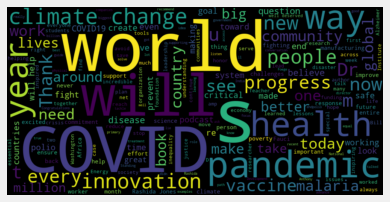

In [14]:
words = " ".join([tweet for tweet in df['Tweets']])
wordcloud = WordCloud(width = 1000, height = 500, random_state = 21, max_font_size = 200).generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
def analysisCol(points):
    if points < 0:
        return 'Negetive'
    elif points == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [16]:
df['Nature of Tweet'] = df['Polarity'].apply(analysisCol)

In [17]:
for i in range(len(df)):
    if df['Nature of Tweet'][i] == 'Positive':
        print(df['Tweets'][i] + '\n')

It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic  

 The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…

What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here  

2021 will be better than 2020. Here’s why 

Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor. 

I've known and learned from  for more than 40 years. I'm glad to see  team up with  to mentor and support companies working to create more economic empowerment opportunities for people across the world. 

This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times.  provides a brilliant and gripping 

In [18]:
for i in range(len(df)):
    if df['Nature of Tweet'][i] == 'Negetive':
        print(df['Tweets'][i] + '\n')

We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. 

 Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

 What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these y

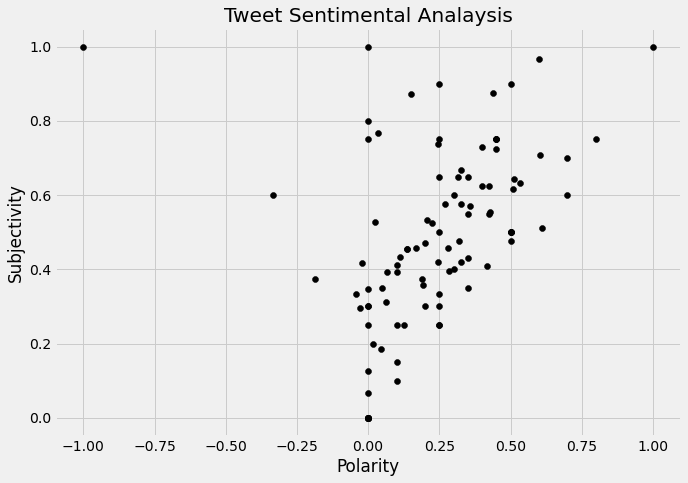

In [19]:
plt.figure(figsize=(10,7))
for i in range(len(df)):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Black')
plt.title('Tweet Sentimental Analaysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Positive Tweet Percentage

In [20]:
positiveTweet = df[df['Nature of Tweet'] == 'Positive']

In [21]:
positivePer = round(positiveTweet.shape[0] / df.shape[0] * 100 , 1)

In [22]:
positivePer

76.0

## Negetive Tweet Percentage

In [23]:
negetiveTweet = df[df['Nature of Tweet'] == 'Negetive']

In [24]:
negetivePer = round(negetiveTweet.shape[0] / df.shape[0] * 100 , 1)

In [25]:
negetivePer

6.0

## Neutral Tweet Percentage


In [26]:
neutralTweet = df[df['Nature of Tweet'] == 'Neutral']

In [27]:
neutralPer = round(neutralTweet.shape[0] / df.shape[0] * 100 , 1)

In [28]:
neutralPer

18.0

# Sentimental Analaysis

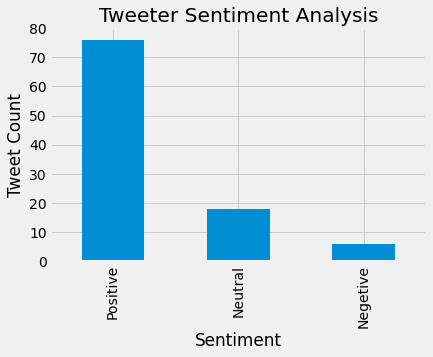

In [29]:
df['Nature of Tweet'].value_counts().plot(kind = 'bar')
plt.title('Tweeter Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.ylim(0, 80)
plt.show()